# <font color='green'>Bonus Homework</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Spring 2022<br>
Course: Performance Evaluation of Computer Systems<br>
Instructor: Dr. Ahmad Khonsari<br>
Chief TA: Bahereh Hassanpour<br> </b> 
</div>


***

<div class="alert alert-block alert-success">
<b>Author:</b><br>
Name: Taban Soleymani <br />
Student Number: 810100377
</div>

***

# <span style="color:purple">Importing Required Packages</span>

In [1]:
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import nbinom
from scipy.stats import poisson

import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np


# <span style="color:purple" size="16">Discrete Random Variables</span>

<b><span style="color:red">Slide #2</span>
<br><b><span style="color:orange">Calculating the moments</span> of the distribution with the aid of $G(z)=\sum^{\infty}_{i=0}p_iz^i$</b> <br />
<span>Note: Since the <b>$p_i$</b> represent a probability distribution their sum equals 1 and</span> <br />
\begin{equation*}
G(1) = G^{(0)}(1) \sum^{\infty}_{i=0}p_i1^i = 1
\end{equation*}
<span>By derivation one sees</span>
\begin{equation*}
G^{(1)}(z) = \frac{d}{dz}E[z^x] = E[Xz^{X-1}]
\end{equation*}

\begin{equation*}
G^{(1)}(1) = E[X]
\end{equation*}
<span>By continuing in the same way one gets</span>
\begin{equation*}
\boxed{G^{(i)}(z) = E[X(X-1)\dots(X-i+1)] = F_i}
\end{equation*}
<span>where $F_i$ is the $i^{th}$ <span style="color:orange">factorial moment.</span>
***

<b><span style="color:red">Slide #3</span>
<br><span style="text-decoration:underline">The relation between factorial moments and ordinary moments (with respect to the origin)</span> <br />
<span>The <span style="color:orange">factorial moments</span> $F_i = E[X(X −1) ···(X −i + 1)]$ and <span style="color:orange">ordinary moments</span> (with resect to the origin) $M_i = E[X^i]$ are related by the linear equations:
\begin{align*}
F_1 &= M_1 & M_1 &= F_1\\
F_2 &= M_2 - M_1 & M_2 &= F_2 + F_1\\
F_3 &= M_3 - 3M_2 + 2M_1 & M_3 &= F_3 + 3F_2 + F_1
\end{align*}
<span>For instance,</span>
\begin{equation*}
\begin{split}
F_2 &= G^{(2)}(1) = E[X(X-1)] = E[X^2] - E[X] \\
&\Rightarrow M_2 = E[X^2] = F_2 + F_1 = G^{(2)}(1) + G^{(1)}(1) \\
&\Rightarrow V[X] = M_2 - M^2_1 = G^{(2)}(1) + G^{(1)}(1) - (G^{(1)}(1))^2 = G^{(1)}(1)(1 - G^{(1)}(1))
\end{split}
\end{equation*}
***

<b><span style="color:red">Slide #4</span>
<br><span style="text-decoration:underline">Direct calculation of the moments</span><br />
<span>The moments can also be derived from the generating function directly, without recourse to the factorial moments, as follows:</span><br />
\begin{equation*}
\begin{split}
\frac{d}{dz}G(z)\Bigg|_{z=1} = E[XZ^X]_{Z=1} = E[X] \\
\frac{d}{dz}z\frac{d}{dz}G(z)\Bigg|_{z=1} = E[X^2Z^X]_{Z=1} = E[X^2]
\end{split}
\end{equation*}
<span>Generally,</span>
\begin{equation*}
E[X^i] = \frac{d}{dz}\left(z\frac{d}{dz}\right)^{i-1}G(z)\Bigg|_{z=1} = \left(z\frac{d}{dz}\right)^i G(z)\Bigg|_{z=1}
\end{equation*}
***

<b><span style="color:red">Code Section for Slide #2 #3 #4</span><br>
<span>see these functions:</span><br>
L5_1_S2_probability_generating_func.m<br>
L5_1_S2_probability_generating_func_derivation1.m<br>
L5_1_S3_factorial_moment.m<br>
L5_1_S3_ordinary_moment.m<br>
<span>run "%% slide 2 & 3 & 4" partition from:</span><br>
L5_discrete_rv_main
***

<b><span style="color:red">Slide #5</span></br>
<span style="text-decoration:underline">Generating function of the sum of independent random variables</span><br />

Let X and Y be independent random variables. Then <br>
$G_{X+Y}(z)=E[z^{X+Y}]=E[z^Xz^Y]$ <br>
$= E[z^X]E[z^Y]$ independence <br>
$= G_X(z)G_Y(z)$ <br>
$G_{X+Y}(z)=G_X(z)G_Y(z)$ <br>
In terms of the original discrete distributions<br>
$𝑝_𝑖=P[X=i]$ <br>
$𝑞_𝑗=P[Y=j]$ <br>
the distribution of the sum is obtained by convolution $p ⨀ q$ 

$P[X + Y = k] = (p ⨀ q)_k = \sum_{i=0}^k 𝑝_𝑖 𝑞_{𝑘−𝑖}$ 

Thus, the generating function of a distribution obtained by convolving two distributions is the product of the generating functions of the respective original distributions. 
***

<b><span style="color:red">Code Section for Slide #5</span>
<br><span>run "%% slide 5" partition from:</span>
<br>L5_discrete_rv_main
***

<b><span style="color:red">Slide #6</span><br>
<span style="text-decoration:underline">Compound distribution and its expectation</span><br />

Let Y be the sum of independent, identically distributed (i.i.d.) random variables $X_i$, <br>
$Y = X_1 + X_2 + ···X_N$ where N is a non-negative integer-valued random variable. We wish to calculate E[Y] <br>
$E[Y]=E[E[Y|N]]=E[NE[X]]=E[N][X]$

$\underline{\text{Reminder: conditional expectation}}$

$E[Y|X=x]=\int_{-∞}^{∞}yf_{Y|X}(y|x)dy \; \; \; E[Y]=\sum_{∀y}yp_{Y|X}(y|x)$ <br>
$E[Y]=E[E[Y|X=x]]=∫_{-\infty}^{∞}E[Y|X=x]f_x(x)dx$ <br>
$=\int_{-∞}^{∞}\int_{-∞}^{∞}yf_{Y|X}(y|x)dyf_X(x)dx$ <br>
$=\int_{-∞}^{∞}y\int_{-∞}^{∞}f_{X,Y}(x,y)dxdy=\int_{-∞}^{∞}yf_Y(y)dy$ 
    
***

<b><span style="color:red">Slide #7</span>
<br><span style="text-decoration:underline">Compound distribution and its generating function</span>

Let $𝑆_𝑁$ be the sum of independent, identically distributed (i.i.d.) random variables $X_i$,

$𝑆_𝑁 = 𝑋_1 + 𝑋_2 + ⋯ + 𝑋_𝑁$ 

where N is a non-negative integer-valued random variable. Denote
<br>$G_X(z)$ the common generating function of the $X_i$ 
<br>$G_X(z)$ the generating function of N 
<br>$E[z^{S_N}|N=n]=[𝐺_𝑋(𝑧)]^𝑛 n = 1, 2, 3, ...$ 
<br>$E[Z^{S_N}]=E[𝑧^{𝑋_1+𝑋_2+⋯+𝑋_𝑁}|N = n]= E[𝑧^{𝑋_1}𝑧^{𝑋_2} … 𝑧^{𝑋_N}|N = n]= E[𝑧^{𝑋_1}] 𝐸[𝑧^{𝑋_2}] … 𝐸[𝑧^{𝑋_N}] = [𝐺_𝑋(𝑧)]^𝑛$ 
    
***

<b><span style="color:red">Slide #8</span>
<br>We wish to calculate $𝐺_{S_N}(z)$ 

$𝐺_{S_N}(z)=E[z^{S_N}]=E[E[z^{S_N}|N]]$  <br>
$=E[E[Z^{S_N}|N]]$ Law of iterated expectations <br>
$=E[G_X(z)^N]$ Using $E[Z^{S_N}|N=n]=[G_X(z)]^n$ <br>
$=G_N(G_X(z))$ <br>
<br>
$G_{S_N}(z)=G_N(G_X(z)) \; \;$ Analogy <br>
$G_Y(z)=E[z^Y] \iff G_N(G_X(z))=E[G_X(z)^N]$ 
    
***

<b><span style="color:red">Code Section for Slide #6 #7 #8</span>
<br><span>see these functions:</span>
<br>L5_1_S6_compound_distribution_expected_value
<br><span>run "%% slide 6 & 7 & 8" partition from:</span>
<br>L5_discrete_rv_main
    
***

<b><span style="color:red">Slide #9</span>
<br><span style="text-decoration:underline">The distribution of max and min of independent RVs</span>

Let $X_1 , X_2 , . . . , X_n$ be independent random variables
<br>(distribution functions $F_i(x)$ and tail distributions $G_i(x), i = 1, . . . , n)$ 

**Distribution of the maximum** 
<br>$P[max( X_1 , X_2 , . . . , X_n ) ≤ x] = P[X_1 ≤ x, . . . , X_n ≤ x]$
<br>$= P[X_1 ≤ x] · · ·P[X_n ≤ x]$ (independence!)
<br>$= F_1(x) · · ·F_n(x)$ 

**Distribution of the minimum** 
<br>$P[min(X_1 , X_2 , . . . , X_n ) > x] = P[X_1 > x, . . . , X_n > x]$ 
<br>$= P[X_1 > x] · · ·P[X_n > x]$ (independence!)
<br>$= G_1(x) · · ·G_n(x)$ 

***

<b><span style="color:red">Code Section for Slide #9</span>
<br><span>see these functions:</span>
<br>L5_1_S9_distribution_of_maximum.m
<br>L5_1_S9_distribution_of_minimum.m
<br><span>run "%% slide 9" partition from:</span>
<br>L5_discrete_rv_main
    
***

<b><span style="color:red">Slide #10</span>
<br><span style="text-decoration:underline">ORDER STATISTICS</span>

Let $X_1 , X_2 , . . . , X_n$ be mutually iid continuous RVs, each having the distribution function F and density f.
<br>Let $Y_1 , Y_2 , . . . , Y_n$ be a permutation of the set $X_1 , X_2 , . . . , X_n$ so as to be in increasing order. 

To be specific:
<br>$Y_1=min (X_1 , X_2 , . . . , X_n )$ 
<br>and
<br>$Y_n=max (X_1 , X_2 , . . . , X_n )$ 
<br>$Y_k$ is called the **k-th order statistic**. 
<br>Since $X_1 , X_2 , . . . , X_n$ are continuous RVs, it follows that
<br>$Y_1< Y_2 <, . . . <Y_n$ (as opposed to $Y_1 ≤ Y_2 ≤ . . . ≤ Y_n$ ) with a probability of one. 

***

<b><span style="color:red">Slide #11</span>
<br><span style="text-decoration:underline">ORDER STATISTICS</span>
<br>As examples of use of order statistics, let X; be the lifetime of the i-th component in a system of n independent components.
<br>series system, $Y_1$ is overall system lifetime. $Y_n$ is the lifetime of a parallel system 
<br>and $Y_{n-m+1}$ is the lifetime of an m-out of-n system (the so-called Ntuple Modular Redundant or NMR system). 
    
***

<b><span style="color:red">Slide #12</span>
<br><span style="text-decoration:underline">ORDER STATISTICS</span>

Deriving the distribution function of $Y_k$
<br>the probability that exactly j of the $X_i$'s lie in(-∞, y] and (n - j) lie in (y, ∞ )is:
<br>${n \choose j} F^𝑗(y)[l − F(y)]^{𝑛−𝑗}$
<br>since the binomial distribution with parameters n and p = F(y) is applicable. 

Then:
$F_{Y_k}(y) = p (y_k ≤ y) = p$ ("at least k of the X;'s lie in the interval (-∞, y] “) 
<br>$=\sum_{j=k}^{n}{n \choose j}F^j(y)[l-F(y)]^{n-j} \; \; \; -∞ \leq y \leq ∞  \; \; (3.52)$ 
    
***

<b><span style="color:red">Slide #13</span>
<br><span style="text-decoration:underline">ORDER STATISTICS</span>

In particular, the distribution functions of $Y_n$ and $Y_1$ ( i.e. max and min ) can be obtained from (3.52) as: 

$F_{𝑌_k}(y) =[F(y)]^𝑛 \; \; \; \; \;   −∞≤ y ≤ ∞$ , 
<br>$F_{𝑌_1}(y) =1−[1−F(y)]^𝑛 \;  \; −∞≤ y ≤ ∞$ 

Thus we obtain:
$R_{series}(t) = Ry_1(t)= 1- F_{𝑌_1}(t) = [1−F(t)]^𝑛 = [R(t)]^𝑛$, 
<br>$R_{parallel}(t) = Ry_1(t)= 1- F_{𝑌_𝑛}(t) = 1−[F(t)]^𝑛 = 1-[1− R (t)]^𝑛 $ 
<br>We may generalize above to the case when the lifetime distributions of individual components are distinct: 
<br>$R_{series}(t) = Ry_1(t)=\prod_{i=1}^{n}R_{iy_1}(t)$ 
    
***

<b><span style="color:red">Code Section for Slide #10 #11 #12 #13</span>
<br><span>see these functions:</span>
<br>L5_1_S10_order_statistics.m
<br><span>run "%% slide 10 & 11 & 12 & 13" partition from:</span>
<br>L5_discrete_rv_main
    
***

<b><span style="color:red">Slide #14</span><br />
### <span>Perf Eval of Comp Systems</span><br />

7. Important distributions. We will deal with:
<br>discrete distributions:
- Bernoulli;
- geometric;
- binomial;
- Poisson.
- Negative Binomial; 

***

<b><span style="color:red">Slide #15</span><br />
### <span>Perf Eval of Comp Systems</span><br />
#### <span style="color: blue">7.1 The Bernoulli(p)</span> 
<span>$X \sim Bernoulli(p)$</span><br>
<b>Assume we have one experiment:</b><br>
<span>event $A$ occurs with probability p; $Pr[\{A\}] = p\ 0 \leq p \leq 1$</span><br>
<span>event $A$ does not occur with probability (1 - p); $Pr[\{\bar{A}\}]= 1 - p = q \quad 0 \leq p \leq 1 \qquad \Omega=\{A,\bar{A}\}$</span><br>
<span>IfX is a r.v. drawn from the Bernoulli(p) distribution, write: X ∼ Bernoulli(p) and we define RV X as:</span>
\begin{equation*}
X = 
\begin{cases}
1 & w/ prob\ p \\
0 & otherwise
\end{cases}
\end{equation*}
<span>The p.m.f. of r.v. X is defined as:</span>
\begin{align*}
P_X(1) &= p \\
P_X(0) &= 1 - p
\end{align*}
***

Enter p value: 0.05


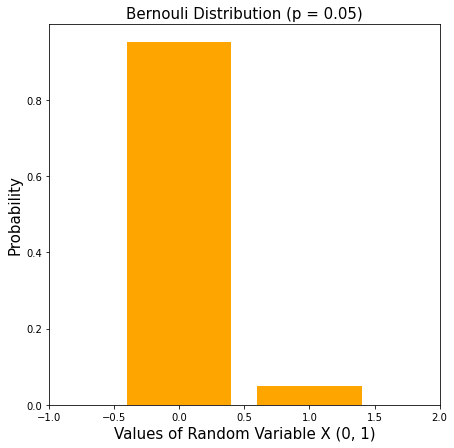

In [3]:
# Parameter initialization
p = float(input("Enter p value: "))
X = [0,1]

# Plot configuration
plt.figure(figsize=(7,7))
plt.xlim(-1,2)
plt.bar(X, bernoulli.pmf(X,p), color='orange')
plt.title(f'Bernouli Distribution (p = {p})', fontsize='15')
plt.xlabel('Values of Random Variable X (0, 1)', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

<b><span style="color:red">Slide #16</span>
<br><span style="text-decoration:underline">Mean and Variance of a Bernoulli Random Variable</span>

The mean is: 

$μ_X=E(X)=\sum_X xP(x)=(0)(1-p)+(1)p=p$ 

And the variance is: 

$\sigma_X^2=E[(X-\mu_x)^2]=\sum_X(x-\mu_x)^2P(x)=(0-p)^2(1-p)+(1-p)^2p=p(1-p)$ 
    
***

<b><span style="color:red">Slide #17</span>
<br><span style="text-decoration:underline">Bernoulli distribution</span>

**Example 1.** X describes the bit stream from a traffic source, which is either on or off. The generating function
<br>$G(z)= p_0z^0 + p_1z^1 = q+ pz$
<br>$E[X]= G^{(1)}(1) = p$ 
<br>$V[X]= G^{(2)}(1) + G^{(1)}(1)(1 − G^{(1)}(1)) = p(1 − p) = pq$ 

**Example 2.** The cell stream arriving at an input port of an ATM switch:
<br>in a time slot (cell slot) there is a cell with probability p or the slot is empty with probability q. 

***

<b><span style="color:red">Code Section for Slide #15 #16 #17</span>
<br><span>see these functions:</span>
<br>L5_1_S15_Bernoulli_dist.m
<br><span>run "%% slide 15 & 16 & 17" partition from:</span>
<br>L5_discrete_rv_main
    
***

<b><span style="color:red">Slide #18</span>
<br><span style="text-decoration:underline">7.2. Binomial(n,p) distribution </span><br />

**Definition:** If X ∼ Binomial(n, p), then X represents the number of successes in n Bernoulli(p) experiments 
<br>(i.e $X=\sum_{i=1}^nY_i$ where $Y_i$ ∼Bernoulli(p) and the Yi are independent (i = 1, . . , n) 

The p.m.f. of r.v. X is defined as follows 

Pr {𝑋 = 𝑘} = $C_n^kp^k(1-p)^{n-k} \; \; k=0, 1, ..., n \; \; 0 \leq p \leq1$ 

***

<b><span style="color:red">Slide #19</span>
<br><span style="text-decoration:underline">Binomial distribution</span><br />

The generating function is obtained directly from the generating function q + pz of a Bernoulli variable 

$G(z)=(q+pz)^n=\sum_{i=1}^n(n, i)p^i(1-p)^{n-i}z^i$ 

By identifying the coefficient of $z^i$ we have 

$p_i = P[X = i] = (n, i)p^i(1-p)^{n-i}$ 

$E[X] = nE[Y_i] = np$ 
$V[X] = nV[Y_i] = np(1 −p)$ 
A limiting form when λ = E[X] = np is fixed and n → ∞: 

$G(z)=(1-(1-z)p)^n=(1-(1-z)\frac{λ}{n})^n→e^{(z-1)λ}$ 
which is the generating function of a Poisson random variable.
    
***

<b><span style="color:red">Code Section for Slide #18 #19</span>
<br><span>see these functions:</span>
<br>L5_1_S18_Binomial_dist
<br>L5_1_S19_Binomial_to_Poisson
<br><span>run "%% slide 18 & 19" partition from:</span>
<br>L5_discrete_rv_main
    
***

<b><span style="color:red">Slide #1</span>
<br><span style="text-decoration:underline">The sum of binomially distributed random variables</span><br />

Let the $X_i(i = 1, . . . , k)$ be binomially distributed with the same parameter p (but with different $n_i$). Then the distribution of their sum is distributed as 

$X_1 + ··· + X_k ∼ Bin(n_1 + ··· + n_k ,p)$ 

because the sum represents the number of successes in a sequence of $n_1 + · · · + n_k$ identical Bernoulli trials. 
***

<b><span style="color:red">Code Section for Slide #1</span>
<br><span>see these functions:</span>
<br>L5_2_S1_sum_of_binomially_distributd_rv.m
<br><span>run "%% slide 1" partition from:</span>
<br>L5_discrete_rv_main

***

<b><span style="color:red">Slide #2</span>
<br><span style="text-decoration:underline">Multinomial distribution</span><br />

Consider a sequence of n identical trials but now each trial has k (k ≥ 2) different outcomes.
<br>Let the probabilities of the outcomes in a single experiment be $p_1, p_2, . . . , p_k (\sum_{i=1}^kpi=1)$ 

Denote the number of occurrences of outcome i in the sequence by $N_i$. 
<br>The problem is to calculate the probability $p(n_1, . . . , n_k) = P[N_1 = n_1, . . . , N_k = n_k]$ of the joint event ${N_1 = n_1, . . . , N_k = n_k}$. 

Define the generating function of the joint distribution of several random variables $N_1, . . . , N_k$ by 

$G(z_1, . . . , z_k) = E[z_1^{N_1} · ··z_k^{N_k} ] = \sum_{n_1=0}^{∞}...∑_{n_k=0}^{∞}p(n_1,...,n_k)z_1^{n_1}...z_k^{n_k}$ 

After one trial one of the $N_i$ is 1 and the others are 0. Thus the generating function corresponding one trial is $(p_1z_1 + ···+ p_kz_k)$. 

The generating function of n independent trials is the product of the generating functions of a
single trial, i.e. $(p_1z_1 + ···+ p_kz_k)^n$. 

From the coefficients of different powers of the zi variables one identifies:

$p(n_1, . . . , n_k) =\frac{n!}{n_1!...n_k!}p_1^{n_1}...p_k^{n_k}$ 
    
***

<b><span style="color:red">Code Section for Slide #2</span>
<br><span>see these functions:</span>
<br>L5_2_S2_Multinomial_dist.m
<br><span> run "%% slide 2" partition from:</span>
<br>L5_discrete_rv_main
    
***

<b><span style="color:red">Slide #3</span>
<br><span style="text-decoration:underline">7.3. Geometric(p) distribution</span><br />
$Perf \; Eval \; of \; Comp \; Systems$ 

Repeating independent Bernoulli(p) experiments until the first success.
<br>p is the probability of success. 

**Definition**: If X ∼ Geometric(p), then X represents the number of trials until we get a success. The p.m.f. of r.v. X is defined as follows: 
<br>$p_X (i) = P[X = i] = (1 − p)^{i−1} p,\; $ where i = 1, 2, 3, . . .

Mean and variance take the following form: 
<br>$E[X]=\frac{p}{1-p} \; \; \; ; \; \; \;
V[X]=\frac{p}{(1-p)^2}$ 

***

<b><span style="color:red">Slide #4</span>
<br><span style="text-decoration:underline">Shifted Geometric distribution** X ∼ Geom(p)</span><br />

X represents the number of failures in a sequence of independent Bernoulli trials (with
the probability of success p) needed before the first success occurs 
<br>$p_i = P[X = i] = (1 − p)^ip \; \; \;  i = 0,1, 2, . . .$ 

$G(z)=p\sum_{i=0}^{∞}(1-p)^iz^i=\frac{p}{1-(1-p)z}$ 

$E[X]=\frac{1-p}{p}$ 
<br>$V[X]=\frac{1-p}{p^2}$ 
***

<b><span style="color:red">Slide #5</span>
<br><span style="text-decoration:underline">Geometric distribution X ∼ Geom(p)</span><br />

X represents the number of trials in a sequence of independent Bernoulli trials (with the probability of success p) needed until the first success occurs 

$p_i = P[X = i] = (1 − p)^{i−1}p \;\;\;\;i = 1, 2, . . .$ 
<br>Generating function 

$𝐺(𝑧) = p\sum_{i=1}^{∞}(1-p)^{i-1}z^i=\frac{pz}{1-(1-p)z}$

This can be used to calculate the expectation and the variance: 

$E[X]=G'(1)=\frac{p(1-(1-p)z)+p(1-p)z}{(1-(1-p)z)^2}|_{z=1}=\frac{1}{p}$ 
<br>$E[X^2]=G''(1)+G'(1)=\frac{1}{p}+\frac{2(1-p)}{p^2}$ 
<br>$V[X]=E[X^2]-E[X]^2=\frac{1-p}{p^2}$
***

<b><span style="color:red">Slide #6</span>
<br><span style="text-decoration:underline">Geometric distribution (continued)</span><br />


The probability that for the first success one needs more than n trials 

$P[X>n]=\sum_{i=n+1}^{∞}p_i=(1-p)^n$ 

$\underline{Memoryless\; property \;of\; geometric \;distribution}$ 

$P[X>i+j|X>i]=\frac{P[X>i+j∩X>i]}{P[X>i]}=\frac{P[X>i+j]}{P[X>i]}=\frac{(1-p)^{i+j}}{(1-p)^i}=P[X>j]$ 

If there have been i unsuccessful trials then the probability that for the first success one needs still more than j new trials <br>is the same as the probability that in a completely new sequence of trails one needs more than j trials for the first success. 

This is as it should be, since the past trials do not have any effect on the future trials, all of which are independent.

***

<b><span style="color:red">Code Section for Slide #3 #4 #5 #6</span>
<br><span>see these functions:</span>
<br>L5_2_S3_Geometric_dist.m
<br>L5_2_S5_probability_generating_func_derivation1_with_input_mean.m
<br>L5_2_S6_is_the_given_probability_distribution_memoryless.m
<br><span>run "%% slide 3 & 4 & 5 & 6" partition from:</span>
<br>L5_discrete_rv_main
    
***

<b><span style="color:red">Slide #7</span>
<br><span style="text-decoration:underline">Negative binomial distribution X ∼ NBin(n, p)</span><br />

X is the number of trials needed in a sequence of Bernoulli trials needed for n successes. 
<br>If X = i, then among the first (i − 1) trials there must have been n − 1 successes and the
<br>trial i must be a success. Thus, 

$Pr[X=i]={n-1 \choose i-1} p^{n-1}(1-p)^{i-n}.p={n-1 \choose i-1}p^n(1-p)^{i-n} \; \; \; \;\; \; $ 

The number of trials for the first success ∼ Geom(p). Similarly, the number of trials needed
from that point on for the next success etc. Thus, 
<br>$X = X_1 + ···+ X_n$ where $X_i ∼ Geom(p)$ (i.i.d.) 

Now, the generating function of the distribution is 

$G(z)=(\frac{pz}{1-(1-p)z})^n$
The point probabilities given above
can also be deduced from this g.f. 

The expectation and the variance are n times those of the geometric distribution 

$E[X]=\frac{n}{p} \; \; \; \; \; \; V[X]=n\frac{1-p}{P^2}$ 
    
***

<b><span style="color:red">Code Section for Slide #7</span>
<br><span>see these functions:</span>
<br>L5_2_S7_Negative_Binomial_dist.m
<br><span>run "%% slide 7" partition from:</span>
<br>L5_discrete_rv_main
    
***

<b><span style="color:red">Slide #8</span><br>
#Perf Eval of Comp Systems 

**7.4. Poisson(λ) distribution** 
<br>**Definition**: X is a non-negative integer-valued random variable with the point
probabilities 

$p_i = P[X = i] =\frac{λ^i}{i!}𝑒^{−λ} \; \; \; i = 0,1,..$ 
<br>**Mean and variance are as follows**: 

E[X] = λ, V[X] = λ 

***

<b><span style="color:red">Slide #9</span>
<br><span style="text-decoration:underline">Poisson distribution X ∼Poisson(λ)</span><br />
$p_i=P[X=i]=\frac{λ^i}{i!}e^{-λ}$ 
<br>The generation function 
<br>$G(z) = \sum_{i=0}^{∞}p_iz^i=e^{-λ}\sum_{i=0}{∞}\frac{(zλ)^i}{i!}=e^{-λ}e^{zλ}$ 
<br>$G(z)=e^{(z-1)λ}$ 
<br>As we saw before, this generating function is obtained as a limiting form of the generating
<br>function of a Bin(n, p) random variable, when the average number of successes is kept fixed,
<br>np = λ, and n tends to infinity. 
<br>Correspondingly, X ∼ Poisson(λt) represents the number of occurrences of events (e.g. arrivals) in an interval of length t <br>from a Poisson process with intensity λ: 
<br>• the probability of an event (‘success’) in a small interval dt is λdt 
<br>• the probability of two simultaneous events is O(λdt) 
<br>• the number of events in disjoint intervals are independent
    
***

<b><span style="color:red">Slide #10</span>
<br><span style="text-decoration:underline">Poisson distribution (continued)</span>

Poisson distribution is obeyed by e.g. 

• The number of arriving calls in a given interval 
<br>• The number of calls in progress in a large (non-blocking) trunk group 

Expectation and variance 

$E[X]=G'(1)=\frac{d}{dz}e^{(z-1)λ}|_{z=1}=λ$ 
<br>$E[X^2]=G''(1)+G'(1)=λ^2+λ$ 
<br>
<br>
$E[X]=λ \; \; \; \; \; \; \; V[X]=λ$ 
    
***

<b><span style="color:red">Code Section for Slide #8 #9 #10</span>
<br><span>see these functions:</span>
<br>L5_2_S8_Poisson_dist.m
<br><span>run "%% slide 8 & 9 & 10" partition from:</span>
<br>L5_discrete_rv_main
    
***

<b><span style="color:red">Slide #11</span>
<br><span style="text-decoration:underline">Properties of Poisson distribution</span><br />

1. The sum of Poisson random variables is Poisson distributed. $X = X_1 + X_2$, where:
<br>$X_1 ∼ Poisson(λ_1), X_2 ∼ Poisson(λ_2)⇒ X ∼Poisson(λ_1 + λ_2)$ 

Proof: 
<br>$G_{X_1}(z)=e^{(z-1)λ_1}, \; \; G_{X_2}(z)=e^{(z-1)λ_2}$ 
<br>$G_X(z)=G_{X_1}(z)G_{X_2}(z)=e^{(z-1)λ_1}e^{(z-1)λ_2}=e^{(z-1)(λ_1+λ_2)}$ 

2. If the number, N , of elements in a set obeys Poisson distribution, N ∼ Poisson(λ), and one makes a random selection with probability p (each element is independently selected with this probability), then the size of the selected set K ∼ Poisson(p λ). 
<br>Proof: K obeys the compound distribution 
<br>$K = X_1 + ···+ X_N$,where N ∼ Poisson(λ) and $X_i ∼ Bernoulli(p)$ 

<br>$G_X(z) = (1 − p) + pz, G_N (z) = e^{(z−1)λ}$
<br>$G_K(z) = G_N (G_X(z)) = e^{(G_X(z)−1)λ} = e^{[(1−p)+pz−1]λ} = e^{(z−1)pλ}$ 
    
***

<b><span style="color:red">Code Section for Slide #11</span>
<br><span>see these functions:</span>
<br>L5_2_S11_sum_of_piossons.m
<br><span>run "%% slide 11" partition from:</span>
<br>L5_discrete_rv_main
    
***

<b><span style="color:red">Slide #12</span>
<br><span style="text-decoration:underline">Properties of Poisson distribution (continued)</span><br />

3. If the elements of a set with size N ∼ Poisson(λ) are randomly assigned to one of two groups 1 and 2 with probabilities $p_1$ and $p_2 = 1−p_1$, then the sizes of the sets 1 and 2, $N_1$ and $N_2$, are independent and distributed as $N_1 ∼ Poisson(p_1λ), N_2 ∼ Poisson(p_2λ)$ 

<br>Proof: By the law of total probability,
$P[N_1 = n_1, N_2 = n_2] = \sum_{n=0}^{∞}P[N_1=n_1, N_2=n_2|N=n]×P[N=n]$
<br>$=\frac{n!}{n_1!n_2!}p_1^{n_1}p_2^{n_2}\frac{λ^n}{n!}e^{-λ}|_{n=n_1+n_2} = \frac{p_1^{n_1}p_2^{n_2}}{n_1!n_2!}λ^{n_1+n_2}e^{-λ(p_1+p_2)}$ 
$=\frac{(p_1λ)^{n_1}}{n_1!}e^{-p_1λ}×\frac{(p_2λ)^{n_2}}{n_2!}e^{-p_2λ}=P[N_1=n_1].P[N_2=n_2]$ 


The joint probability is of product form ⇒ $N_1$ are $N_2$ independent. The factors in the
product are point probabilities of Poisson($p_1λ$) and Poisson($p_2λ$) distributions.
Note, the result can be generalized for any number of sets. 
    
***

<b><span style="color:red">Code Section for Slide #12</span>
<br><span>see these functions:</span>
<br>L5_2_S11_sum_of_piossons.m
<br><span>run "%% slide 12" partition from:</span>
<br>L5_discrete_rv_main
    
***

<b><span style="color:red">Slide #13</span><br>
#Perf Eval of Comp Systems
    
**7.5 Generating function of the complementary distribution** 

Let X be a random variable that assumes integer k with probability $𝑝_𝑘$ and let $𝑞_𝑘$ be the distribution for its tails: 

$𝑞_𝑘 = P[X >k] =𝑝_{𝑘+1} + 𝑝_{𝑘+2} + ⋯$ 

We denote the PGF of {$𝑝_𝑘$} by P(z) and the generating function of {$𝑞_𝑘$} by Q(z). Then it is not difficult to find the following simple
relation: 

$Q(z)=\frac{1-p(z)}{1-z}$

***

<b><span style="color:red">Code Section for Slide #13</span>
<br><span>see these functions:</span>
<br>L5_2_S13_generating_func_of_complementary_distribution.m
<br><span>run "%% slide 13" partition from:</span>
<br>L5_discrete_rv_main
    
***